In [1]:
import numpy as np
import pandas as pd
import sqlite3 as sql
import plotly.express as px
import os

In [32]:
connection = sql.connect(r"C:\Users\salma\Downloads\basketball.sqlite\basketball.sqlite")

In [69]:
query = """
    SELECT 
        yearDraft as year_drafted,
        COUNT(DISTINCT idPlayer) AS total_drafted
    FROM Draft
    GROUP BY yearDraft;
"""
year_draft_total = pd.read_sql(query, connection).astype({"year_drafted": int})
year_draft_total

,year_drafted,total_drafted
0,1949,75
1,1950,121
2,1951,87
3,1952,106
4,1953,122
...,...,...
67,2016,60
68,2017,60
69,2018,60
70,2019,60


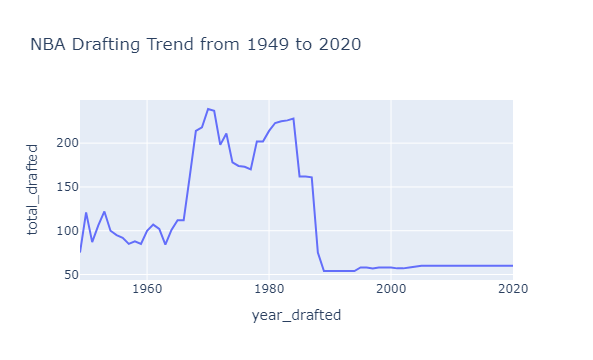

In [72]:
px.line(year_draft_total, 
        x="year_drafted", y="total_drafted", 
        title='NBA Drafting Trend from 1949 to 2020')

In [76]:
query = """
    SELECT 
        nameTeam as nba_team,
        COUNT(DISTINCT idPlayer) AS total_drafted
    FROM Draft
    GROUP BY idTeam
    ORDER BY total_drafted DESC
    limit 10;
"""
total_teams = pd.read_sql(query, connection)
total_teams 

,nba_team,total_drafted
0,Atlanta Hawks,514
1,Sacramento Kings,511
2,Philadelphia 76ers,487
3,New York Knicks,474
4,Golden State Warriors,451
5,Boston Celtics,448
6,Detroit Pistons,431
7,Los Angeles Lakers,426
8,Washington Wizards,411
9,Chicago Bulls,341


In [87]:
query = """
    SELECT 
        MIN(yearDraft) as first_draft_year ,  nameTeam as nba_team, 
        COUNT(DISTINCT yearDraft) AS years_drafted,
        COUNT(DISTINCT idPlayer) AS total_drafted_to_date
    FROM Draft
    GROUP BY idTeam
    ORDER BY yearDraft
"""
nba_team_first_draft_year = pd.read_sql(query, connection).astype({"first_draft_year": int})
nba_team_first_draft_year.style.background_gradient(subset=['years_drafted','total_drafted_to_date'])

,first_draft_year,nba_team,years_drafted,total_drafted_to_date
0,1949,Baltimore Bullets,6,68
1,1949,Chicago Stags,2,13
2,1949,Indianapolis Olympians,4,36
3,1949,Providence Steamrollers,1,9
4,1949,St. Louis Bombers,1,10
5,1949,Washington Capitols,2,15
6,1949,Boston Celtics,72,448
7,1949,Philadelphia Warriors,69,451
8,1949,Minneapolis Lakers,71,426
9,1949,New York Knicks,69,474


In [89]:
# For each year, how many team first started drafting new players
print("For each year, how many team first started drafting new players?")
nba_team_first_draft_year["first_draft_year"].value_counts()

For each year, how many team first started drafting new players?


first_draft_year
1949    12
1977     4
1970     3
1950     2
1967     2
1968     2
1988     2
1989     2
1995     2
1961     1
1966     1
1974     1
1980     1
2003     1
Name: count, dtype: int64

In [91]:
nba_team_first_draft_year.drop(["first_draft_year"], axis=1).describe()

,years_drafted,total_drafted_to_date
count,36.000000,36.000000
mean,41.138889,218.444444
std,23.073984,170.582271
min,1.000000,9.000000
25%,27.250000,59.500000
50%,44.000000,176.500000
75%,55.000000,358.500000
max,72.000000,514.000000


In [105]:
query = """
    SELECT typeOrganizationFrom as organization , COUNT(DISTINCT idPlayer ) as player_count
    FROM Draft
    GROUP BY typeOrganizationFrom;
"""
draft_player_org = pd.read_sql(query, connection)
draft_player_org

,organization,player_count
0,None,15
1,College/University,7389
2,High School,48
3,Other Team/Club,304


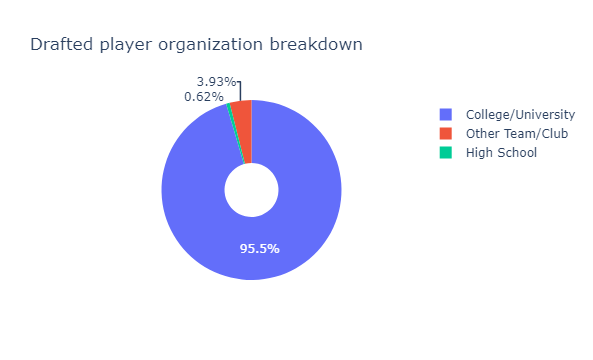

In [111]:
# 15 players have unreported organization record. I didn't include them in comparison
px.pie(draft_player_org.iloc[1:,], values='player_count', names='organization', hole=0.3,
       title="Drafted player organization breakdown")

In [118]:
query = """
    SELECT 
        namePlayer AS player_name,
        nameTeam AS team_name,
        2021 - strftime('%Y', Player_Attributes.BIRTHDATE) AS age,
        Player_Attributes.DRAFT_YEAR AS draft_year,
        2021 - Player_Attributes.DRAFT_YEAR AS years_in_NBA,
        Player_Attributes.POSITION AS game_position,
        ROUND(value/1000000) AS salary_in_millions
    FROM Player_Salary
    JOIN Player ON
        Player_Salary.namePlayer = Player.full_name
    JOIN Player_Attributes ON
        Player.ID = Player_Attributes.ID
    WHERE slugSeason = '2020-21'
    ORDER BY salary_in_millions DESC
    LIMIT 10;
"""
player_salary_top_10 = pd.read_sql(query, connection)
player_salary_top_10

,player_name,team_name,age,draft_year,years_in_NBA,game_position,salary_in_millions
0,Stephen Curry,Golden State Warriors,33,2009,12,Guard,43.0
1,James Harden,Brooklyn Nets,32,2009,12,Guard,41.0
2,John Wall,Houston Rockets,31,2010,11,Guard,41.0
3,Chris Paul,Phoenix Suns,36,2005,16,Guard,41.0
4,Russell Westbrook,Washington Wizards,33,2008,13,Guard,41.0
5,Kevin Durant,Brooklyn Nets,33,2007,14,Forward,40.0
6,LeBron James,Los Angeles Lakers,37,2003,18,Forward,39.0
7,Klay Thompson,Golden State Warriors,31,2011,10,Guard,35.0
8,Paul George,Los Angeles Clippers,31,2010,11,Forward,35.0
9,Mike Conley,Utah Jazz,34,2007,14,Guard,35.0


In [120]:
# get the top 10 earning player salary data
query = """
    SELECT 
        namePlayer AS player_name,
        nameTeam AS team_name,
        Player_Attributes.DRAFT_YEAR AS draft_year,
        Player_Attributes.POSITION AS game_position,
        Player_Attributes.PTS AS points,
        Player_Attributes.AST AS assists,
        Player_Attributes.REB AS rebounds,
        ROUND(value/1000000) AS salary_in_millions
    FROM Player_Salary
    JOIN Player ON
        Player_Salary.namePlayer = Player.full_name
    JOIN Player_Attributes ON
        Player.ID = Player_Attributes.ID
    WHERE slugSeason = '2020-21'
    ORDER BY salary_in_millions DESC
    LIMIT 10;
"""
player_salary_top_10_game_stats = pd.read_sql(query, connection)
player_salary_top_10_game_stats

,player_name,team_name,draft_year,game_position,points,assists,rebounds,salary_in_millions
0,Stephen Curry,Golden State Warriors,2009,Guard,29.0,6.2,5.3,43.0
1,James Harden,Brooklyn Nets,2009,Guard,25.3,11.2,7.9,41.0
2,John Wall,Houston Rockets,2010,Guard,21.1,6.3,3.5,41.0
3,Chris Paul,Phoenix Suns,2005,Guard,15.7,8.8,4.7,41.0
4,Russell Westbrook,Washington Wizards,2008,Guard,21.7,10.3,9.5,41.0
5,Kevin Durant,Brooklyn Nets,2007,Forward,29.0,5.3,7.3,40.0
6,LeBron James,Los Angeles Lakers,2003,Forward,25.4,7.9,7.9,39.0
7,Klay Thompson,Golden State Warriors,2011,Guard,21.5,2.4,3.8,35.0
8,Paul George,Los Angeles Clippers,2010,Forward,22.5,5.5,6.0,35.0
9,Mike Conley,Utah Jazz,2007,Guard,16.4,5.5,3.4,35.0


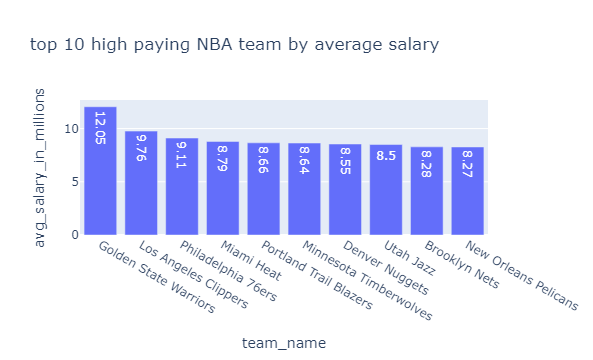

,team_name,avg_salary_in_millions
0,Golden State Warriors,12.05
1,Los Angeles Clippers,9.76
2,Philadelphia 76ers,9.11
3,Miami Heat,8.79
4,Portland Trail Blazers,8.66
5,Minnesota Timberwolves,8.64
6,Denver Nuggets,8.55
7,Utah Jazz,8.50
8,Brooklyn Nets,8.28
9,New Orleans Pelicans,8.27


In [122]:
# get the top 10 team with high median salary by player
query = """
    SELECT 
        nameTeam AS team_name,
        ROUND(AVG(value/1000000), 2) AS avg_salary_in_millions
    FROM Player_Salary
    WHERE slugSeason = '2020-21'
    GROUP BY team_name
    ORDER BY avg_salary_in_millions DESC
    LIMIT 10;
"""
team_top_10_paying = pd.read_sql(query, connection)
fig = px.bar(team_top_10_paying, x="team_name", y="avg_salary_in_millions", 
             text="avg_salary_in_millions", title="top 10 high paying NBA team by average salary")
fig.show()
team_top_10_paying